In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import datasets
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.utils import shuffle

In [11]:
###Data loading
housing_data = datasets.load_boston()

In [12]:
###Shuffle data to increase data analysis objectivity
Х, у= shuffle(housing_data.data, housing_data.target,
              random_state=7)

In [13]:
###Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    Х, у, test_size=0.2, random_state=7)

In [14]:
###AdaBoost Regressor Model
regressor = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=4),
    n_estimators=400, random_state=7)

regressor.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=4,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
                  

In [19]:
###Calculating AdaBoost Regressor performance indicators
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
print("\nADAВOOST REGRESSOR")
print("Mean squared error =", round(mse, 2))
print("Explained variance score =", round(evs, 2))


ADAВOOST REGRESSOR
Mean squared error = 22.94
Explained variance score = 0.79


In [21]:
###Feature importances
feature_importances = regressor.feature_importances_
feature_names = housing_data.feature_names

In [24]:
###Normalization of feature importnaces
feature_importances = 100.0 * (feature_importances / max(feature_importances))

In [25]:
###Sort and swap values
index_sorted = np.flipud(np.argsort(feature_importances))

In [28]:
###Labeling along the "X" axis
pos = np.arange(index_sorted.shape[0]) + 0.5

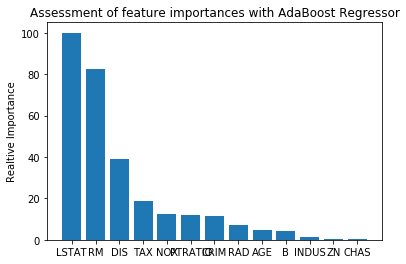

In [29]:
###Building a bar chart
plt.figure ()
plt.bar(pos, feature_importances[index_sorted], align='center')
plt.xticks(pos, feature_names[index_sorted])
plt.ylabel('Realtive Importance')
plt.title('Assessment of feature importances with AdaBoost Regressor')
plt.show()